In [20]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=42)

In [14]:
def problem1():
    # Problem 1:
    NUM_KNAPSACKS = 3
    NUM_ITEMS = 20
    NUM_DIMENSIONS = 2
    VALUES = rng.integers(0, 100, size=NUM_ITEMS)
    WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
    CONSTRAINTS = rng.integers(
        0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
    )
    
    return NUM_KNAPSACKS, NUM_ITEMS, NUM_DIMENSIONS, VALUES, WEIGHTS, CONSTRAINTS

In [15]:
def problem2():
    # Problem 2:
    NUM_KNAPSACKS = 10
    NUM_ITEMS = 100
    NUM_DIMENSIONS = 10
    VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
    WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
    CONSTRAINTS = rng.integers(
        1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
    )
    
    return NUM_KNAPSACKS, NUM_ITEMS, NUM_DIMENSIONS, VALUES, WEIGHTS, CONSTRAINTS

In [17]:
def problem3():
    # Problem 3:
    NUM_KNAPSACKS = 100
    NUM_ITEMS = 5000
    NUM_DIMENSIONS = 100
    VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
    WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
    CONSTRAINTS = rng.integers(
        1000 * 10, 1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
    )
    
    return NUM_KNAPSACKS, NUM_ITEMS, NUM_DIMENSIONS, VALUES, WEIGHTS, CONSTRAINTS

In [19]:
def check_constraints(solution, WEIGHTS, CONSTRAINTS):
    """
    Check if a given solution satisfies all knapsack constraints

    Parameters:
    solution: Array of shape (NUM_ITEMS,), each element is -1 (not used) or knapsack index [0..NUM_KNAPSACKS-1]
    WEIGHTS: Array of shape (NUM_ITEMS, NUM_DIMENSIONS) containing the weights of each item per dimension
    CONSTRAINTS: Array of shape (NUM_KNAPSACKS, NUM_DIMENSIONS) with the max capacity of each knapsack per dimension

    Returns:
    valid: True if all constraints are satisfied, False otherwise
    used_capacity: Matrix (NUM_KNAPSACKS, NUM_DIMENSIONS) showing total used capacity per knapsack
    """

    num_knapsacks, num_dims = CONSTRAINTS.shape

    used_capacity = np.zeros((num_knapsacks, num_dims))

    for i,k in enumerate(solution):
        if k==-1:
            continue
        used_capacity[k] += WEIGHTS[i]

    valid = np.all(used_capacity <= CONSTRAINTS)

    return valid, used_capacity

In [ ]:
def genetic_algorithm():

In [ ]:
def simulated_annealing():

In [26]:
def fitness(solution, VALUES, WEIGHTS, CONSTRAINTS, penalty_factor=10):
    valid, used_capacity = check_constraints(solution, WEIGHTS, CONSTRAINTS)
    total_value = np.sum([VALUES[i] for i,k in enumerate(solution) if k!=-1])
    if valid: 
        return total_value
    else:
        overload = np.maximum(used_capacity - CONSTRAINTS, 0)
        penalty = penalty_factor * np.sum(overload)
        return total_value - penalty
    
def heuristic(solution_matrix, VALUES, WEIGHTS, CONSTRAINTS):
    num_knapsacks = CONSTRAINTS.shape[0]
    num_items = VALUES.shape[0]
    eta = np.zeros((num_items, num_knapsacks + 1))
    for i in range(num_items):
        for k in range(num_knapsacks):
            weight_ratio = np.sum(WEIGHTS[i]/CONSTRAINTS[k])
            eta[i, k] = VALUES[i] / (weight_ratio + 1e-6)
        eta[i, num_knapsacks] = 1
    return eta

def ant_colony(NUM_ITEMS, NUM_KNAPSACKS, VALUES, WEIGHTS, CONSTRAINTS, NUM_ANTS=50, NUM_GENERATIONS=100, alpha=1, beta=2, evaporation_rate=0.1, penalty_factor=10):
    pheromone = np.ones((NUM_ITEMS, NUM_KNAPSACKS+1))
    eta = heuristic(pheromone, VALUES, WEIGHTS, CONSTRAINTS)

    best_solution = None
    best_fitness = -np.inf
    fitness_history = []

    for gen in range(NUM_GENERATIONS):
        ant_solutions = []
        ant_fitness = []

        for ant in range(NUM_ANTS):
            solution = []
            for i in range(NUM_ITEMS):
                probs = np.zeros(NUM_KNAPSACKS+1)
                for k in range(NUM_KNAPSACKS+1):
                    probs[k] = (pheromone[i, k]**alpha)*(eta[i, k]**beta)
                probs = np.maximum(probs, 1e-6)
                probs /= probs.sum()
                chosen_k = np.random.choice(NUM_KNAPSACKS+1, p=probs)
                solution.append(chosen_k if chosen_k != NUM_KNAPSACKS else -1)
            ant_solutions.append(solution)
            f = fitness(solution, VALUES, WEIGHTS, CONSTRAINTS, penalty_factor)
            ant_fitness.append(f)

            if f > best_fitness:
                best_fitness = f
                best_solution = solution.copy()

        pheromone *= (1 - evaporation_rate)
        for sol, f in zip(ant_solutions, ant_fitness):
            for i, k in enumerate(sol):
                index = k if k != -1 else NUM_KNAPSACKS
                pheromone[i, index] += f/1000.0

        fitness_history.append(best_fitness)

        if gen % 10 == 0 or gen == NUM_GENERATIONS-1:
            print(f"Generation {gen+1}, best fitness: {best_fitness}")

    plt.figure(figsize=(10,5))
    plt.plot(fitness_history, marker='o', linestyle='-')
    plt.title("ACO: Best Fitness Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.grid(True)
    plt.show()

    return best_solution, best_fitness

Generation 1, best fitness: -4674.0
Generation 11, best fitness: 268.0
Generation 21, best fitness: 268.0
Generation 31, best fitness: 268.0
Generation 41, best fitness: 268.0
Generation 50, best fitness: 388.0


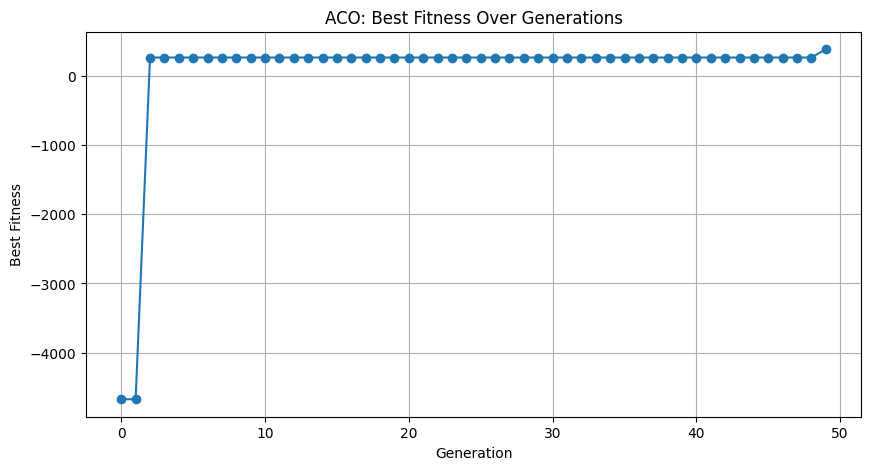


Best solution: [0, 2, 0, 1, -1, 0, 1, -1, 2, -1, -1, 2, -1, 2, -1, 2, -1, 2, -1, -1]
Valid: False
Used capacity:
 [[108. 139.]
 [126.  30.]
 [349. 197.]]
Total value: 638


In [38]:
NUM_KNAPSACKS, NUM_ITEMS, NUM_DIMENSIONS, VALUES, WEIGHTS, CONSTRAINTS = problem1()

best_solution, best_fitness = ant_colony(NUM_ITEMS, NUM_KNAPSACKS, VALUES, WEIGHTS, CONSTRAINTS, NUM_ANTS=30, NUM_GENERATIONS=50)

print("\nBest solution:", best_solution)
valid, used_capacity = check_constraints(best_solution, WEIGHTS, CONSTRAINTS)
print("Valid:", valid)
print("Used capacity:\n", used_capacity)
print("Total value:", np.sum([VALUES[i] for i, k in enumerate(best_solution) if k != -1]))